# Data Exploration and Preprocessing:

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

In [2]:
df = pd.read_csv('Breast Cancer Diagnosis Dataset with Tumor Characteristics.csv')
print(df.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [4]:
data_cleaned = df.drop(['id', 'Unnamed: 32'], axis=1)

In [5]:
data_cleaned['diagnosis'] = data_cleaned['diagnosis'].map({'M': 1, 'B': 0})

In [6]:
print(data_cleaned.isnull().sum())

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [7]:
X = data_cleaned.drop('diagnosis', axis=1)
y = data_cleaned['diagnosis']

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [10]:
print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


# Model Development

In [12]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [13]:
y_pred_knn = knn_model.predict(X_test)

In [14]:
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [15]:
y_pred_logreg = logreg_model.predict(X_test)

In [16]:
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1

In [17]:
knn_eval = evaluate_model(y_test, y_pred_knn)

In [18]:
logreg_eval = evaluate_model(y_test, y_pred_logreg)

In [19]:
print("KNN Performance:")
print(f"Accuracy: {knn_eval[0]:.4f}, Precision: {knn_eval[1]:.4f}, Recall: {knn_eval[2]:.4f}, F1-Score: {knn_eval[3]:.4f}")

print("\nLogistic Regression Performance:")
print(f"Accuracy: {logreg_eval[0]:.4f}, Precision: {logreg_eval[1]:.4f}, Recall: {logreg_eval[2]:.4f}, F1-Score: {logreg_eval[3]:.4f}")

# Confusion Matrices
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)

print("\nConfusion Matrix (KNN):")
print(conf_matrix_knn)

print("\nConfusion Matrix (Logistic Regression):")
print(conf_matrix_logreg)

KNN Performance:
Accuracy: 0.9474, Precision: 0.9302, Recall: 0.9302, F1-Score: 0.9302

Logistic Regression Performance:
Accuracy: 0.9737, Precision: 0.9762, Recall: 0.9535, F1-Score: 0.9647

Confusion Matrix (KNN):
[[68  3]
 [ 3 40]]

Confusion Matrix (Logistic Regression):
[[70  1]
 [ 2 41]]


# Model Evaluation

In [20]:
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1

# KNN evaluation
accuracy_knn, precision_knn, recall_knn, f1_knn = evaluate_model(y_test, y_pred_knn)

# Logistic Regression evaluation
accuracy_logreg, precision_logreg, recall_logreg, f1_logreg = evaluate_model(y_test, y_pred_logreg)

# Display results for both models
print("KNN Performance:")
print(f"Accuracy: {accuracy_knn:.4f}, Precision: {precision_knn:.4f}, Recall: {recall_knn:.4f}, F1-Score: {f1_knn:.4f}")

print("\nLogistic Regression Performance:")
print(f"Accuracy: {accuracy_logreg:.4f}, Precision: {precision_logreg:.4f}, Recall: {recall_logreg:.4f}, F1-Score: {f1_logreg:.4f}")

# Confusion Matrices
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)

print("\nConfusion Matrix (KNN):")
print(conf_matrix_knn)

print("\nConfusion Matrix (Logistic Regression):")
print(conf_matrix_logreg)

KNN Performance:
Accuracy: 0.9474, Precision: 0.9302, Recall: 0.9302, F1-Score: 0.9302

Logistic Regression Performance:
Accuracy: 0.9737, Precision: 0.9762, Recall: 0.9535, F1-Score: 0.9647

Confusion Matrix (KNN):
[[68  3]
 [ 3 40]]

Confusion Matrix (Logistic Regression):
[[70  1]
 [ 2 41]]


# Report and Visualizations

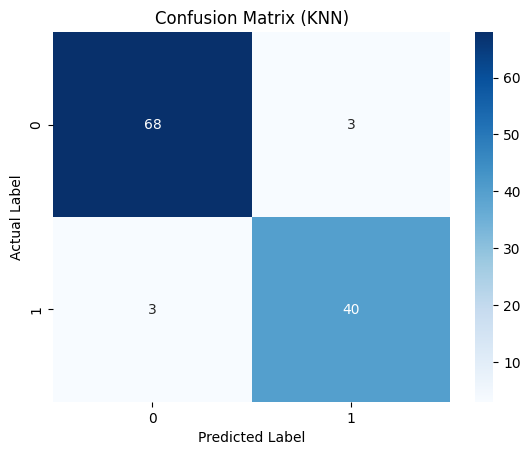

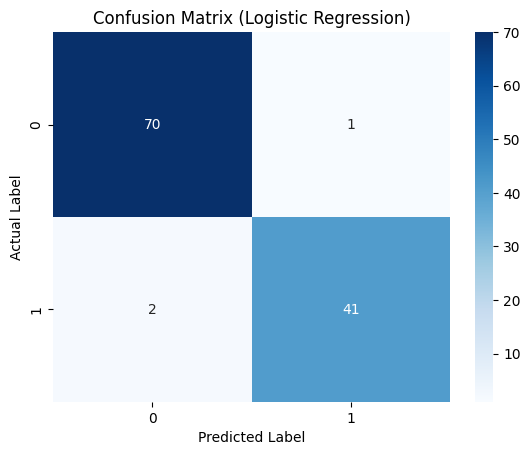

In [23]:
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (KNN)")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Confusion Matrix for Logistic Regression
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Logistic Regression)")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [25]:
pca = PCA(n_components=2)
X_train_2D = pca.fit_transform(X_train)
X_test_2D = pca.transform(X_test)

In [26]:
knn_model.fit(X_train_2D, y_train)
logreg_model.fit(X_train_2D, y_train)

LogisticRegression(max_iter=1000)

In [27]:
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50, cmap=plt.cm.RdYlBu)
    plt.title(title)
    plt.show()


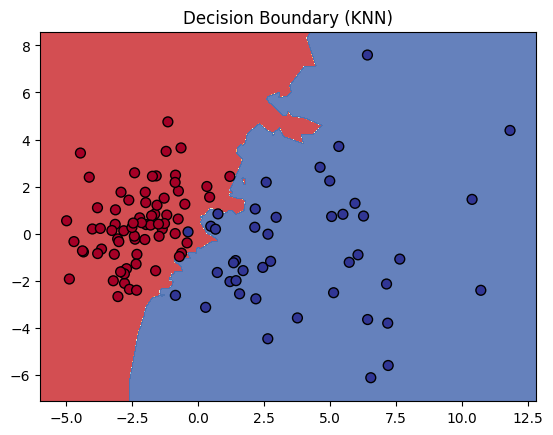

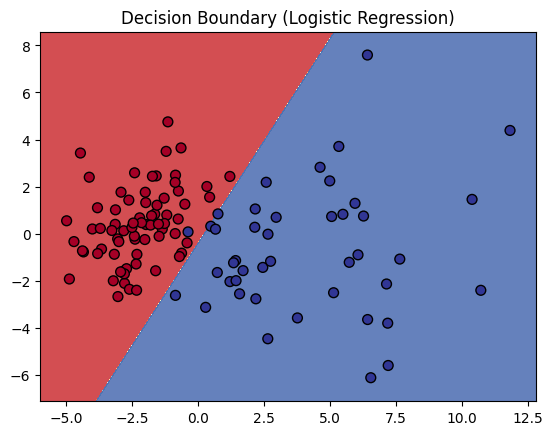

In [28]:
plot_decision_boundary(knn_model, X_test_2D, y_test, "Decision Boundary (KNN)")


plot_decision_boundary(logreg_model, X_test_2D, y_test, "Decision Boundary (Logistic Regression)")